In [1]:
%matplotlib inline
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('font', size=20)



# Loading Dataset

## IOT Devices

The dataset has been extracted at `ROOT_PATH`, containing the data for each IOT device. There are 9 devices in total. There are folders for each IOT device containing `benign_traffic.csv` and further two folders for `gafgyt_attacks` and `mirai_attacks`

In [3]:
ROOT_PATH = r'/mnt/data/khiz/dataset/00442'

IOT_DEVS = [ 'Danmini_Doorbell',
             'Ecobee_Thermostat',
             'Ennio_Doorbell',
             'B120N10_Baby_Mon',
             '737E_Security_Cam',
             '838_Security_Cam',
             'Samsung_Webcam',
             '1002_Security_Cam',
             '1003_Security_Cam'
           ]

## Paths to CSVs
We create a python dictionary that contains all the paths to the CSVs for the respective IOT devices

In [4]:
PATHS_DICT = {}

for i in IOT_DEVS:
    PATHS_DICT[i] = {}
    print('[' + i + ']')
    iot_dir = os.path.join(ROOT_PATH, i)
    PATHS_DICT[i]['benign'] = os.path.join(iot_dir, 'benign_traffic.csv')
    print('  ', 'benign_traffic.csv')
    attacks = [ d for d in os.listdir(iot_dir)
                   if os.path.isdir( os.path.join(iot_dir, d)) ]
    for attack in attacks:
        attack_name = attack.split('_')[0]
        
        PATHS_DICT[i][attack_name] = {}
        attack_dir = os.path.join(iot_dir, attack)
        types = [ f for f in os.listdir(attack_dir)
                   if os.path.isfile( os.path.join(attack_dir, f)) ]
        print('  ', attack_name, ': ', types)
        for t in types:
            type_name = t.split('.')[0]
            PATHS_DICT[i][attack_name][type_name] = os.path.join(attack_dir,t)

[Danmini_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ecobee_Thermostat]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ennio_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
[B120N10_Baby_Mon]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[737E_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[838_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.cs

## Loading CSVs into Pandas
We will create pandas dataframe for each botnet attack on each IOT device. For each datafram we will combine the attack traffic with the benign traffic add the following two columns:
- `traffic_type` : benign or attack (0 or 1)
- `attack_type`  : type of attack e.g, ack, scan etc.

In [5]:
nbaiot_dict = {}
for iot_dev in PATHS_DICT:
    nbaiot_dict[iot_dev] = {}
    b_df = pd.read_csv(PATHS_DICT[iot_dev]['benign'])
    b_df['traffic_type'] = 'benign'
    b_df['attack_type'] = 'benign'
    #nbaiot_dict[iot_dev] = nbaiot_dict[iot_dev].append(df)
    for botnet in [ b for b in PATHS_DICT[iot_dev] if b != 'benign']:
        nbaiot_dict[iot_dev][botnet] = pd.DataFrame()
        nbaiot_dict[iot_dev][botnet] = nbaiot_dict[iot_dev][botnet].append(b_df)
        for attack in PATHS_DICT[iot_dev][botnet]:
            a_df = pd.read_csv(PATHS_DICT[iot_dev][botnet][attack])
            a_df['traffic_type'] = 'attack'
            a_df['attack_type'] = attack
            nbaiot_dict[iot_dev][botnet] = nbaiot_dict[iot_dev][botnet].append(a_df)

In [6]:
for k in nbaiot_dict:
    print(k)
    for b in nbaiot_dict[k]:
        print('  ',b,':','<benign+attack>')

Danmini_Doorbell
   gafgyt : <benign+attack>
   mirai : <benign+attack>
Ecobee_Thermostat
   gafgyt : <benign+attack>
   mirai : <benign+attack>
Ennio_Doorbell
   gafgyt : <benign+attack>
B120N10_Baby_Mon
   gafgyt : <benign+attack>
   mirai : <benign+attack>
737E_Security_Cam
   gafgyt : <benign+attack>
   mirai : <benign+attack>
838_Security_Cam
   gafgyt : <benign+attack>
   mirai : <benign+attack>
Samsung_Webcam
   gafgyt : <benign+attack>
1002_Security_Cam
   gafgyt : <benign+attack>
   mirai : <benign+attack>
1003_Security_Cam
   gafgyt : <benign+attack>
   mirai : <benign+attack>


# Modeling

### Pre processing
Convert the target column `traffic_type` to integer 0 = benigh, 1 = attack 

In [7]:
for dev in nbaiot_dict:
    for botnet in nbaiot_dict[dev]:
        nbaiot = nbaiot_dict[dev][botnet]

        nbaiot.loc[ nbaiot['traffic_type']=='attack','traffic_type' ]=1
        nbaiot.loc[ nbaiot['traffic_type']=='benign','traffic_type' ]=0
        nbaiot['traffic_type'] = nbaiot['traffic_type'].astype(int)
        
        nbaiot_dict[dev][botnet] = nbaiot

### Classifiers and training functions

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
classfiers = {
    'KNN' : KNeighborsClassifier(),
    'RFR' : RandomForestClassifier(),
    'DTR' : DecisionTreeClassifier(),
    'ADB' : AdaBoostClassifier(),
    
}

def train_test_report( X, y, test_size=0.33, avg='macro avg' ):

    X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.33, random_state=42)

    result = []
    for clf_name in classfiers:
        clf = classfiers[clf_name]
        clf.fit(X_train, y_train)
        
        y_preds = clf.predict(X_test)
        
        clrp = classification_report(y_test, y_preds, output_dict=True)
        conf_mat = confusion_matrix(y_test, y_preds)
        fp = conf_mat[0][1]
        fn = conf_mat[1][0]
        
        result.append([
            clf_name,
            clrp['accuracy'],
            clrp[avg]['precision'],
            clrp[avg]['recall'],
            clrp[avg]['f1-score'],
            fp,
            fn
        ])

    return result

## Main Loop

In [11]:
all_results = [
    ['DEVICE','BOTNET', 'CLASSIFIER', 'ACCURACY', 'PRECISION', 'RECALL', 'F1-SCORE', 'FALSE-P', 'FALSE-N' ]
]
for dev in nbaiot_dict:
    for botnet in nbaiot_dict[dev]:
        nbaiot = nbaiot_dict[dev][botnet]
        
        print("================", dev, "/", botnet, "================")

        X = nbaiot.drop( ["attack_type", "traffic_type" ], axis=1 )
        y = nbaiot["traffic_type"]

        rep = train_test_report( X, y)
        for r in rep:
            print(r)
            all_results.append( [dev, botnet] + r )

        print("================================================================")
        print("")
        

================ Danmini_Doorbell / gafgyt ================
['KNN', 0.9983781010542343, 0.9958236432018861, 0.9972949612517443, 0.9965577251288404, 69, 127]
['RFR', 0.9999751750161362, 0.9999344385131816, 0.9999600329742343, 0.9999472352706003, 1, 2]
['DTR', 0.9999586250268937, 0.9999248520312785, 0.9998992574789141, 0.9999120542819608, 3, 2]
['ADB', 0.9999751750161362, 0.9999088533754633, 0.9999856310828417, 0.9999472379716858, 0, 3]

================ Danmini_Doorbell / mirai ================
['KNN', 0.9986093355906437, 0.9939346519707908, 0.9954962951818089, 0.9947140200243505, 133, 189]
['RFR', 0.9999956811664306, 0.9999694413885833, 0.9999976763963696, 0.9999835584228483, 0, 1]
['DTR', 0.9999870434992917, 0.9999083353703251, 0.9999930291891088, 0.9999506780538334, 0, 3]
['ADB', 0.9999870434992917, 0.9999083353703251, 0.9999930291891088, 0.9999506780538334, 0, 3]

================ Ecobee_Thermostat / gafgyt ================
['KNN', 0.9987831816990528, 0.9954461508552326, 0.988879518

In [97]:
res_df =pd.DataFrame(all_results, index=None)

res_df, res_df.columns = res_df[1:] , res_df.iloc[0]

res_df

,DEVICE,BOTNET,CLASSIFIER,ACCURACY,PRECISION,RECALL,F1-SCORE,FALSE-P,FALSE-N
1,Danmini_Doorbell,gafgyt,KNN,0.998378,0.995824,0.997295,0.996558,69,127
2,Danmini_Doorbell,gafgyt,RFR,0.999975,0.999934,0.99996,0.999947,1,2
3,Danmini_Doorbell,gafgyt,DTR,0.999959,0.999925,0.999899,0.999912,3,2
4,Danmini_Doorbell,gafgyt,ADB,0.999975,0.999909,0.999986,0.999947,0,3
5,Danmini_Doorbell,mirai,KNN,0.998609,0.993935,0.995496,0.994714,133,189
6,Danmini_Doorbell,mirai,RFR,0.999996,0.999969,0.999998,0.999984,0,1
7,Danmini_Doorbell,mirai,DTR,0.999987,0.999908,0.999993,0.999951,0,3
8,Danmini_Doorbell,mirai,ADB,0.999987,0.999908,0.999993,0.999951,0,3
9,Ecobee_Thermostat,gafgyt,KNN,0.998783,0.995446,0.98888,0.992139,95,35
10,Ecobee_Thermostat,gafgyt,RFR,0.999963,0.99976,0.99976,0.99976,2,2


In [37]:
# Write to csv
res_csv = res_df.to_csv(index=False)

print(res_csv, file=open('02_results.csv', 'w'))


### Load results from CSV

In [101]:
res_df = pd.read_csv('02_results.csv')

res_df = res_df[['DEVICE', 'BOTNET', 'CLASSIFIER', 'ACCURACY', 'PRECISION', 'FALSE-P', 'FALSE-N' ]]

res_df

,DEVICE,BOTNET,CLASSIFIER,ACCURACY,PRECISION,FALSE-P,FALSE-N
0,Danmini_Doorbell,gafgyt,KNN,0.998378,0.995824,69,127
1,Danmini_Doorbell,gafgyt,RFR,0.999975,0.999934,1,2
2,Danmini_Doorbell,gafgyt,DTR,0.999959,0.999925,3,2
3,Danmini_Doorbell,gafgyt,ADB,0.999975,0.999909,0,3
4,Danmini_Doorbell,mirai,KNN,0.998609,0.993935,133,189
5,Danmini_Doorbell,mirai,RFR,0.999996,0.999969,0,1
6,Danmini_Doorbell,mirai,DTR,0.999987,0.999908,0,3
7,Danmini_Doorbell,mirai,ADB,0.999987,0.999908,0,3
8,Ecobee_Thermostat,gafgyt,KNN,0.998783,0.995446,95,35
9,Ecobee_Thermostat,gafgyt,RFR,0.999963,0.999760,2,2


In [102]:
res_df.set_index(['DEVICE', 'BOTNET', 'CLASSIFIER'], inplace=True)
res_df

ACCURACY  PRECISION  FALSE-P  FALSE-N
DEVICE            BOTNET CLASSIFIER                                       
Danmini_Doorbell  gafgyt KNN         0.998378   0.995824       69      127
                         RFR         0.999975   0.999934        1        2
                         DTR         0.999959   0.999925        3        2
                         ADB         0.999975   0.999909        0        3
                  mirai  KNN         0.998609   0.993935      133      189
                         RFR         0.999996   0.999969        0        1
                         DTR         0.999987   0.999908        0        3
                         ADB         0.999987   0.999908        0        3
Ecobee_Thermostat gafgyt KNN         0.998783   0.995446       95       35
                         RFR         0.999963   0.999760        2        2
                         DTR         0.999953   0.999534        1        4
                         ADB         0.999981   0.999990        2        0
                  mirai  KNN         0.999267   0.996645      101       26
                         RFR         0.999988   0.999769        0        2
                         DTR         0.999988   0.999769        0        2
                         ADB         0.999994   0.999885        0        1
Ennio_Doorbell    gafgyt KNN         0.998057   0.993740       75      153
                         RFR         0.999957   0.999942        4        1
                         DTR         0.999966   0.999913        2        2
                         ADB         0.999923   0.999889        7        2
B120N10_Baby_Mon  gafgyt KNN         0.998168   0.997561       26      269
                         RFR         0.999950   0.999935        1        7
                         DTR         0.999863   0.999840        8       14
                         ADB         0.999950   0.999931        0        8
                  mirai  KNN         0.993604   0.994198     1391      268
                         RFR         0.999992   0.999983        0        2
                         DTR         0.999996   0.999991        0        1
                         ADB         0.999996   0.999991        0        1
737E_Security_Cam gafgyt KNN         0.997350   0.994074      122      221
                         RFR         0.999954   0.999854        0        6
                         DTR         0.999892   0.999797        7        7
                         ADB         0.999954   0.999873        1        5
                  mirai  KNN         0.995754   0.991620      416      282
                         RFR         0.999994   0.999976        0        1
                         DTR         0.999994   0.999976        0        1
                         ADB         0.999994   0.999976        0        1
838_Security_Cam  gafgyt KNN         0.996937   0.995053      131      281
                         RFR         0.999978   0.999954        0        3
                         DTR         0.999933   0.999893        3        6
                         ADB         0.999993   0.999985        0        1
                  mirai  KNN         0.992881   0.990114      779      461
                         RFR         0.999994   0.999985        0        1
                         DTR         0.999994   0.999985        0        1
                         ADB         0.999994   0.999985        0        1
Samsung_Webcam    gafgyt KNN         0.997464   0.993144       91      223
                         RFR         0.999984   0.999942        0        2
                         DTR         0.999927   0.999860        5        4
                         ADB         0.999992   0.999971        0        1
1002_Security_Cam gafgyt KNN         0.997696   0.993812       88      178
                         RFR         0.999991   0.999968        0        1
                         DTR         0.999983   0.999963        1        1
                         ADB         1.000000   1.000000      

In [93]:
res_df0 = res_df.unstack(level=1)
res_df0

F1-SCORE          
BOTNET                          gafgyt     mirai
DEVICE            CLASSIFIER                    
1002_Security_Cam ADB         1.000000  1.000000
                  DTR         0.999963  1.000000
                  KNN         0.995028  0.993917
                  RFR         0.999981  0.999911
1003_Security_Cam ADB         0.999917  1.000000
                  DTR         0.999834  0.999716
                  KNN         0.991887  0.984291
                  RFR         0.999917  1.000000
737E_Security_Cam ADB         0.999913  0.999986
                  DTR         0.999797  0.999986
                  KNN         0.995039  0.990233
                  RFR         0.999913  0.999986
838_Security_Cam  ADB         0.999990  0.999991
                  DTR         0.999909  0.999991
                  KNN         0.995827  0.988256
                  RFR         0.999970  0.999991
B120N10_Baby_Mon  ADB         0.999946  0.999994
                  DTR         0.999852  0.999994
                  KNN         0.998013  0.990673
                  RFR         0.999946  0.999989
Danmini_Doorbell  ADB         0.999947  0.999951
                  DTR         0.999912  0.999951
                  KNN         0.996558  0.994714
                  RFR         0.999947  0.999984
Ecobee_Thermostat ADB         0.999880  0.999941
                  DTR         0.999700  0.999882
                  KNN         0.992139  0.992414
                  RFR         0.999760  0.999882
Ennio_Doorbell    ADB         0.999804       NaN
                  DTR         0.999913       NaN
                  KNN         0.995044       NaN
                  RFR         0.999891       NaN
Samsung_Webcam    ADB         0.999983       NaN
                  DTR         0.999848       NaN
                  KNN         0.994720       NaN
                  RFR         0.999966       NaN

In [94]:
res_df1 = res_df0.unstack(level=1)
res_df1

F1-SCORE                                                    \
BOTNET               gafgyt                                   mirai             
CLASSIFIER              ADB       DTR       KNN       RFR       ADB       DTR   
DEVICE                                                                          
1002_Security_Cam  1.000000  0.999963  0.995028  0.999981  1.000000  1.000000   
1003_Security_Cam  0.999917  0.999834  0.991887  0.999917  1.000000  0.999716   
737E_Security_Cam  0.999913  0.999797  0.995039  0.999913  0.999986  0.999986   
838_Security_Cam   0.999990  0.999909  0.995827  0.999970  0.999991  0.999991   
B120N10_Baby_Mon   0.999946  0.999852  0.998013  0.999946  0.999994  0.999994   
Danmini_Doorbell   0.999947  0.999912  0.996558  0.999947  0.999951  0.999951   
Ecobee_Thermostat  0.999880  0.999700  0.992139  0.999760  0.999941  0.999882   
Ennio_Doorbell     0.999804  0.999913  0.995044  0.999891       NaN       NaN   
Samsung_Webcam     0.999983  0.999848  0.994720  0.999966       NaN       NaN   

                                       
BOTNET                                 
CLASSIFIER              KNN       RFR  
DEVICE                                 
1002_Security_Cam  0.993917  0.999911  
1003_Security_Cam  0.984291  1.000000  
737E_Security_Cam  0.990233  0.999986  
838_Security_Cam   0.988256  0.999991  
B120N10_Baby_Mon   0.990673  0.999989  
Danmini_Doorbell   0.994714  0.999984  
Ecobee_Thermostat  0.992414  0.999882  
Ennio_Doorbell          NaN       NaN  
Samsung_Webcam          NaN       NaN

<AxesSubplot:xlabel='DEVICE'>

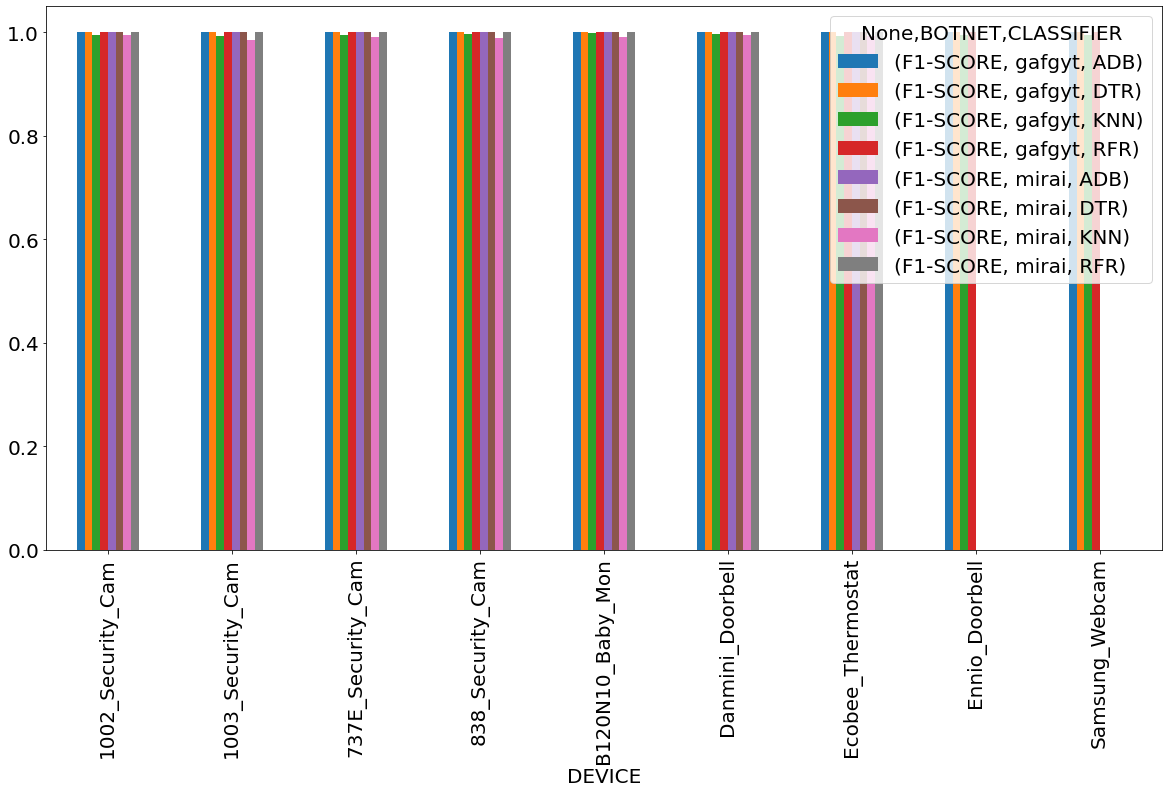

In [96]:
res_df1.plot(kind='bar')